In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ppiech/openaigym/spinningup

In [7]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/discounts/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/discounts/



/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


ActionsAdvantageMean  ActionsClipFrac  ActionsEntropy  ActionsKL  \
0                       NaN              NaN             NaN        NaN   
1                       NaN              NaN             NaN        NaN   
2                       NaN              NaN             NaN        NaN   
3                       NaN              NaN             NaN        NaN   
4                       NaN              NaN             NaN        NaN   
5                       NaN              NaN             NaN        NaN   
6                       NaN              NaN             NaN        NaN   
7                       NaN              NaN             NaN        NaN   
8                       NaN              NaN             NaN        NaN   
9                       NaN              NaN             NaN        NaN   
10                      NaN              NaN             NaN        NaN   
11                      NaN              NaN             NaN        NaN   
12                      NaN              NaN             NaN        NaN   
13                      NaN              NaN             NaN        NaN   
14                      NaN              NaN             NaN        NaN   
15                      NaN              NaN             NaN        NaN   
16                      NaN              NaN             NaN        NaN   
17                      NaN              NaN             NaN        NaN   
18                      NaN              NaN             NaN        NaN   
19                      NaN              NaN             NaN        NaN   
20                      NaN              NaN             NaN        NaN   
21                      NaN              NaN             NaN        NaN   
22                      NaN              NaN             NaN        NaN   
23                      NaN              NaN             NaN        NaN   
24                      NaN              NaN             NaN        NaN   
25                      NaN              NaN             NaN        NaN   
26                      NaN              NaN             NaN        NaN   
27                      NaN              NaN             NaN        NaN   
28                      NaN              NaN             NaN        NaN   
29                      NaN              NaN             NaN        NaN   
...                     ...              ...             ...        ...   
19143              0.590836         0.107500       -0.851102   0.013519   
19144              2.423571         0.074167       -0.868591   0.014890   
19145              2.153221         0.024583       -0.880204   0.006597   
19146              0.821259         0.096667       -0.846179   0.015739   
19147             -1.208895         0.122500       -0.889505   0.001818   
19148              1.391301         0.093333       -0.882994   0.015791   
19149              0.080846         0.122083       -0.894475   0.009935   
19150              1.689534         0.119167       -0.867132   0.015868   
19151              0.262672         0.103333       -0.873436   0.013197   
19152              0.251637         0.103333       -0.897419   0.013456   
19153              1.220169         0.089167       -0.908014   0.016200   
19154              1.302378         0.070417       -0.866546   0.015596   
19155             -0.884233         0.110417       -0.878197  -0.002902   
19156              1.978637         0.062500       -0.868263   0.015049   
19157             -0.883304         0.136250       -0.846453   0.012336   
19158              1.825339         0.076250       -0.857290   0.010182   
19159              0.109118         0.087917       -0.846741   0.012371   
19160             -0.760050         0.112083       -0.860568  -0.004591   
19161              1.420560         0.074167       -0.855790   0.015541   
19162              1.576697         0.088750       -0.831570   0.015779   
19163              0.305571         0.117917       -0.854554   0.014839   
19164              1.960684     

In [15]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
           'goal_octaves', 
            'goal_discount_rate', 
           'invese_buffer_size',
#           'no_step_reward', 
           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

exp_name  steps_per_epoch  goal_octaves  \
0     discounts_pendulum-v0_goa0-1             2400             6   
8   discounts_pendulum-v0_goa0-001             2400             6   
15   discounts_pendulum-v0_goa0-01             2400             6   
22         discounts-0_pendulum-v0             2400             6   

    goal_discount_rate  invese_buffer_size  finish_action_path_on_new_goal  
0                0.100                   3                            True  
8                0.001                   3                            True  
15               0.010                   3                            True  
22               0.000                   3                            True

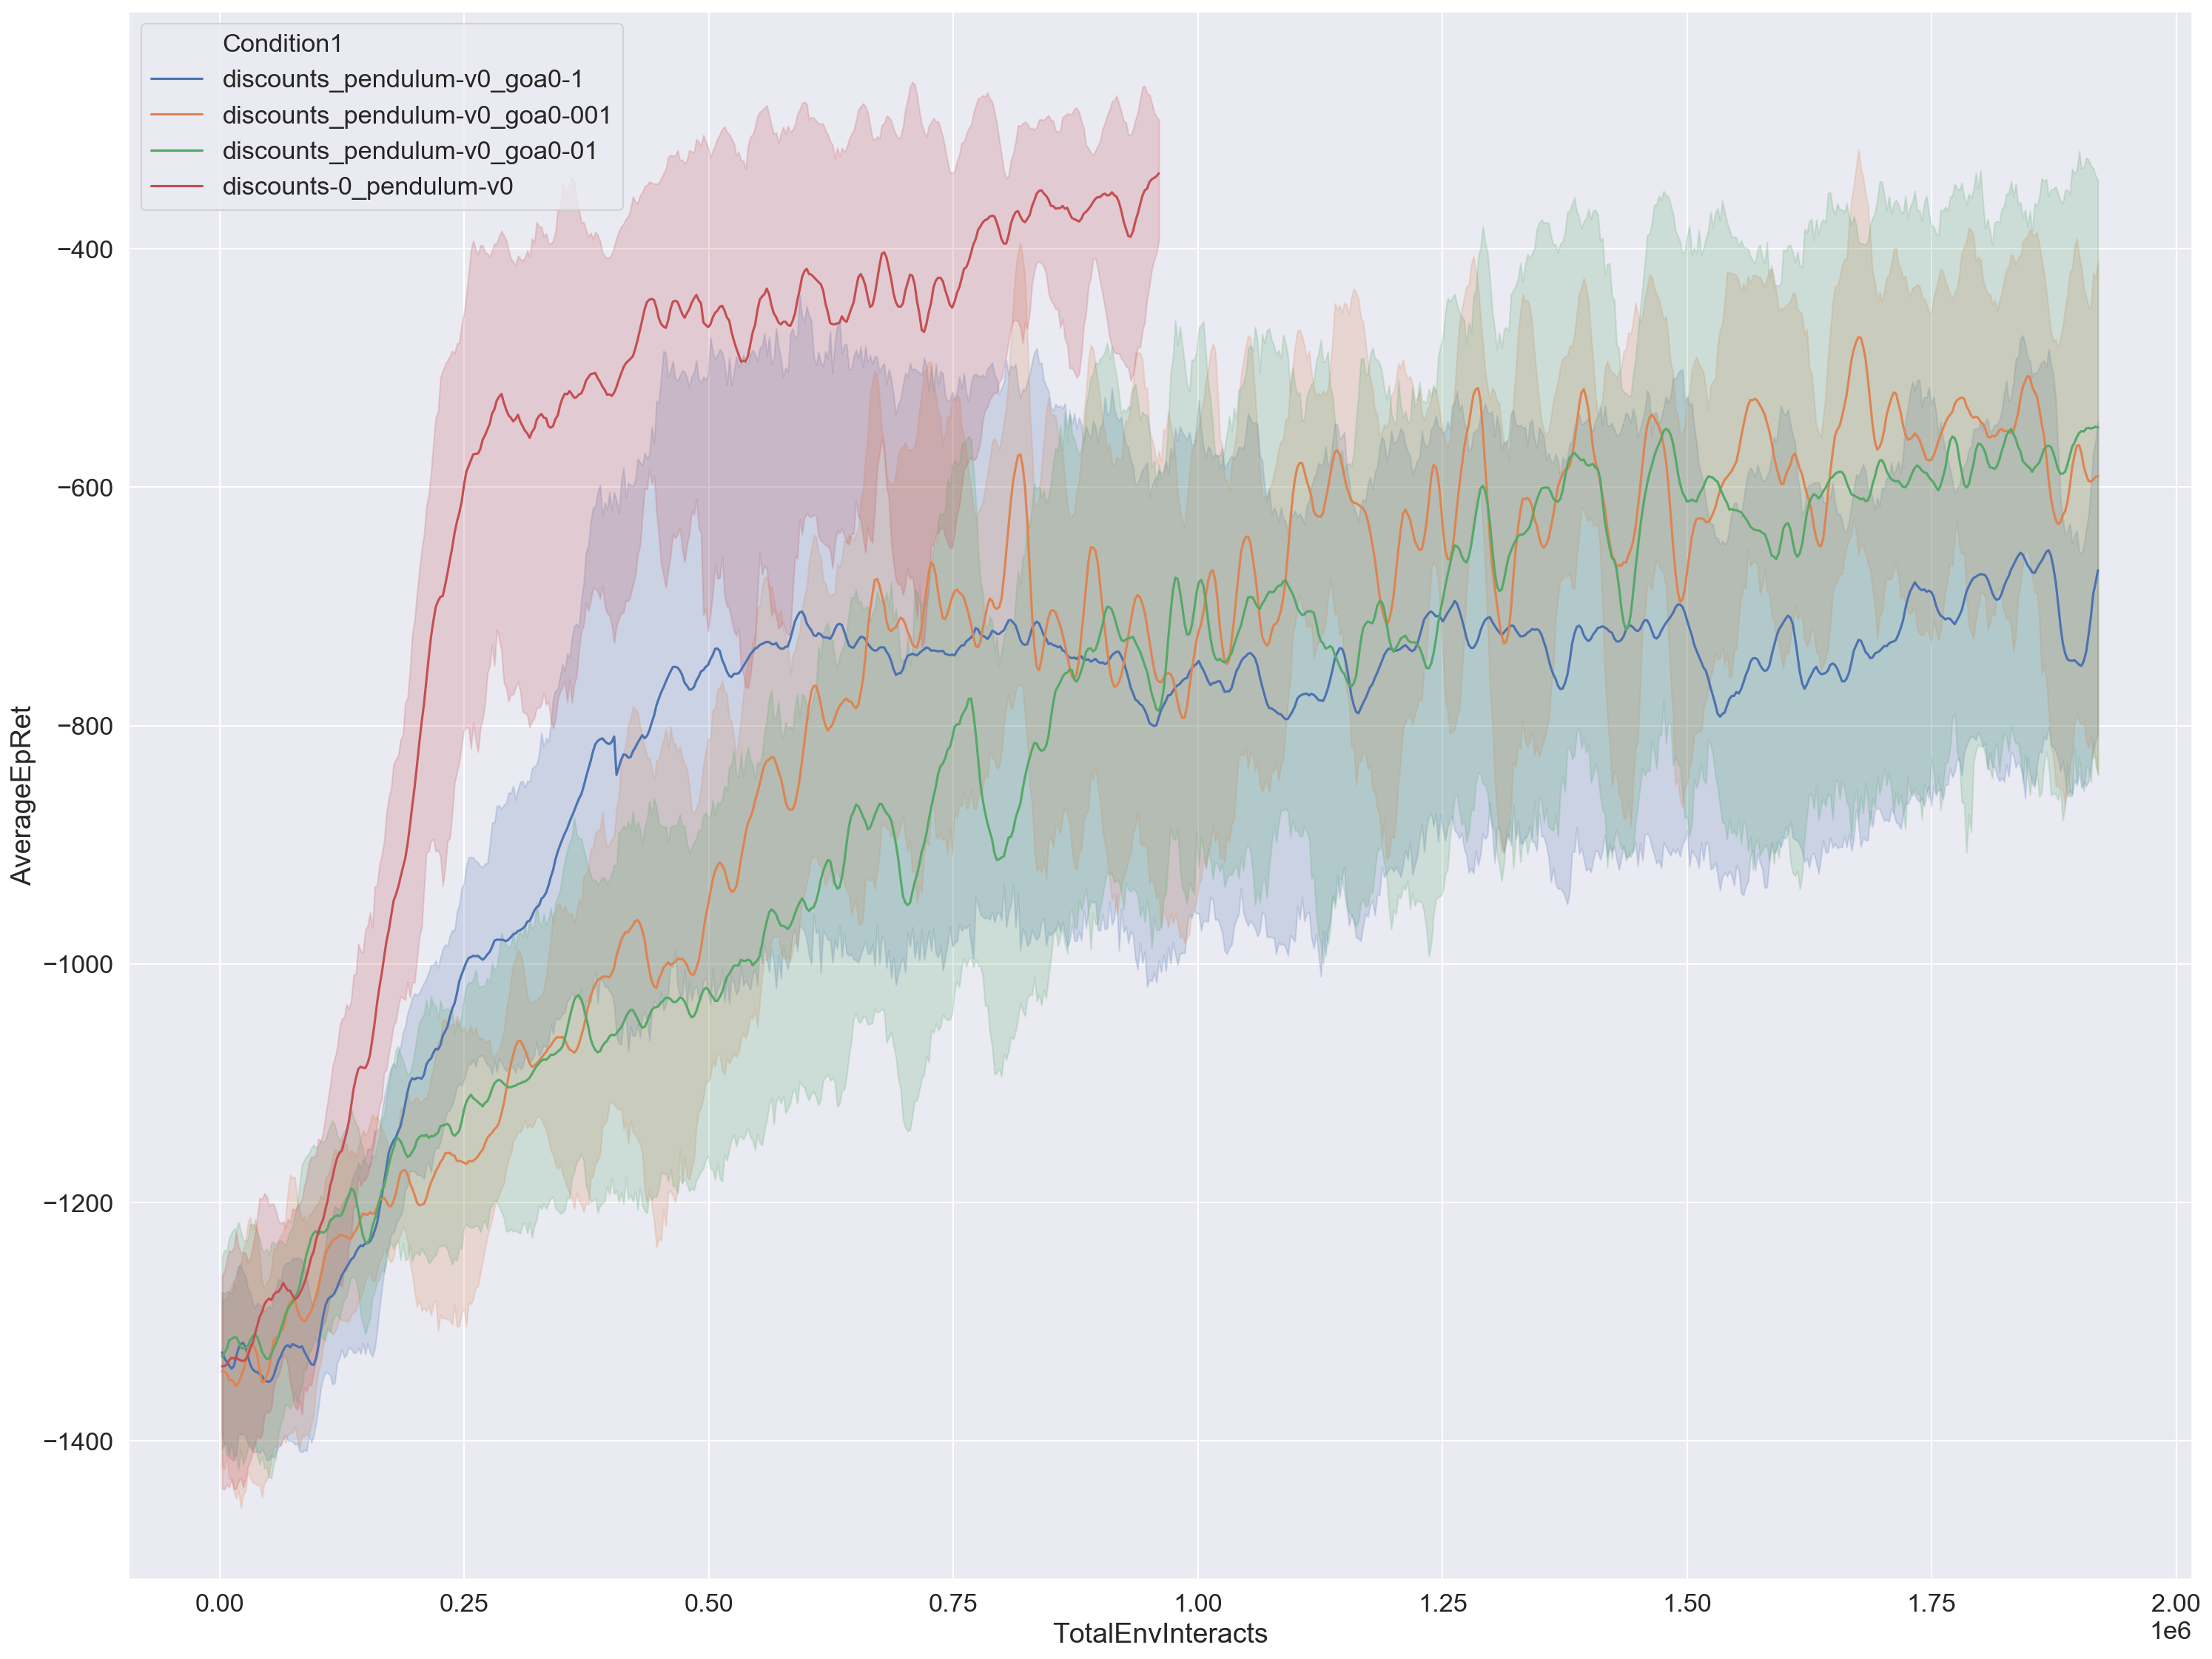

In [16]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, xaxis='TotalEnvInteracts')
plt.show()

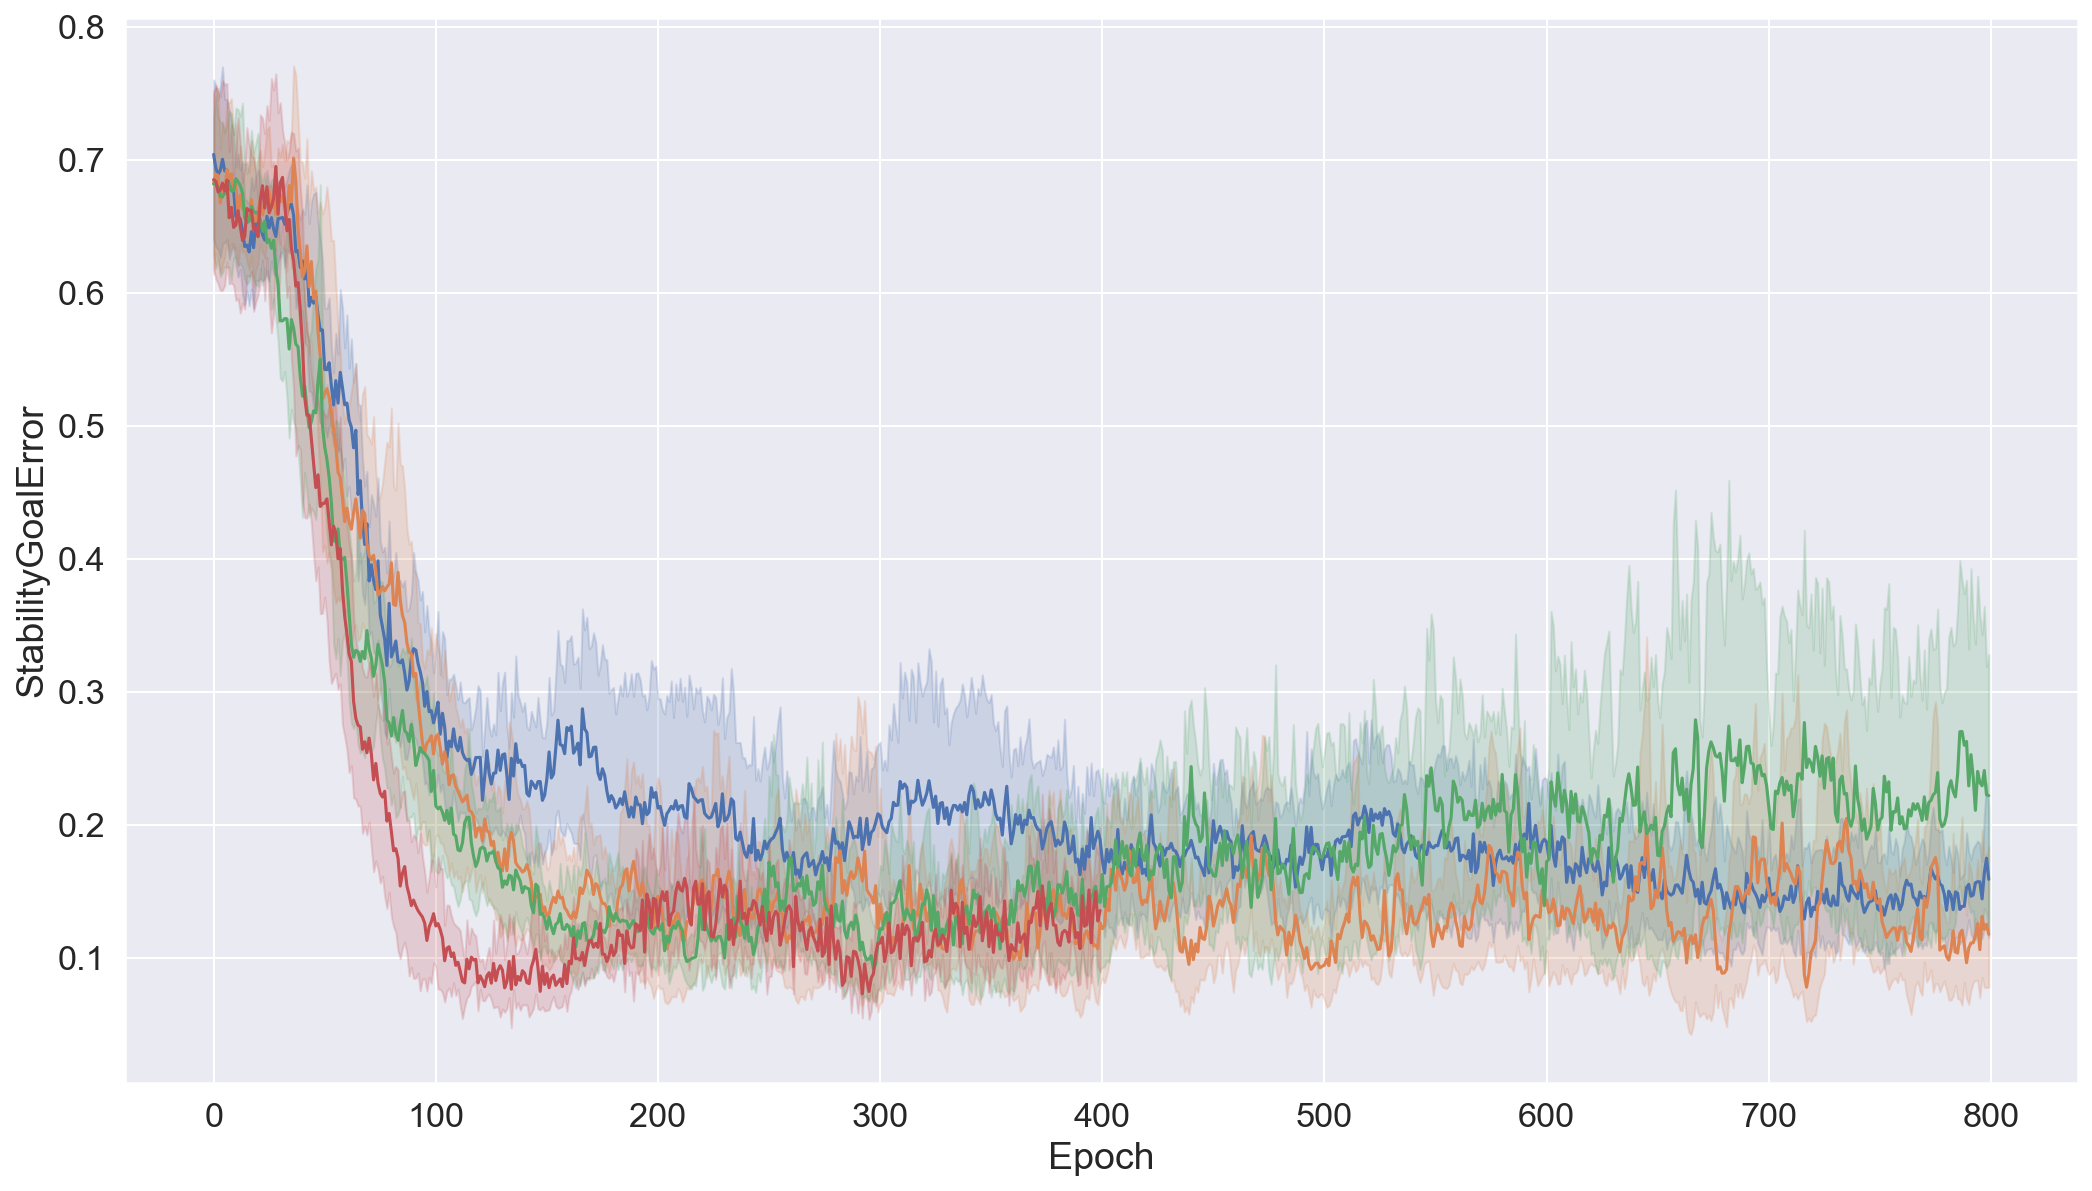

In [10]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

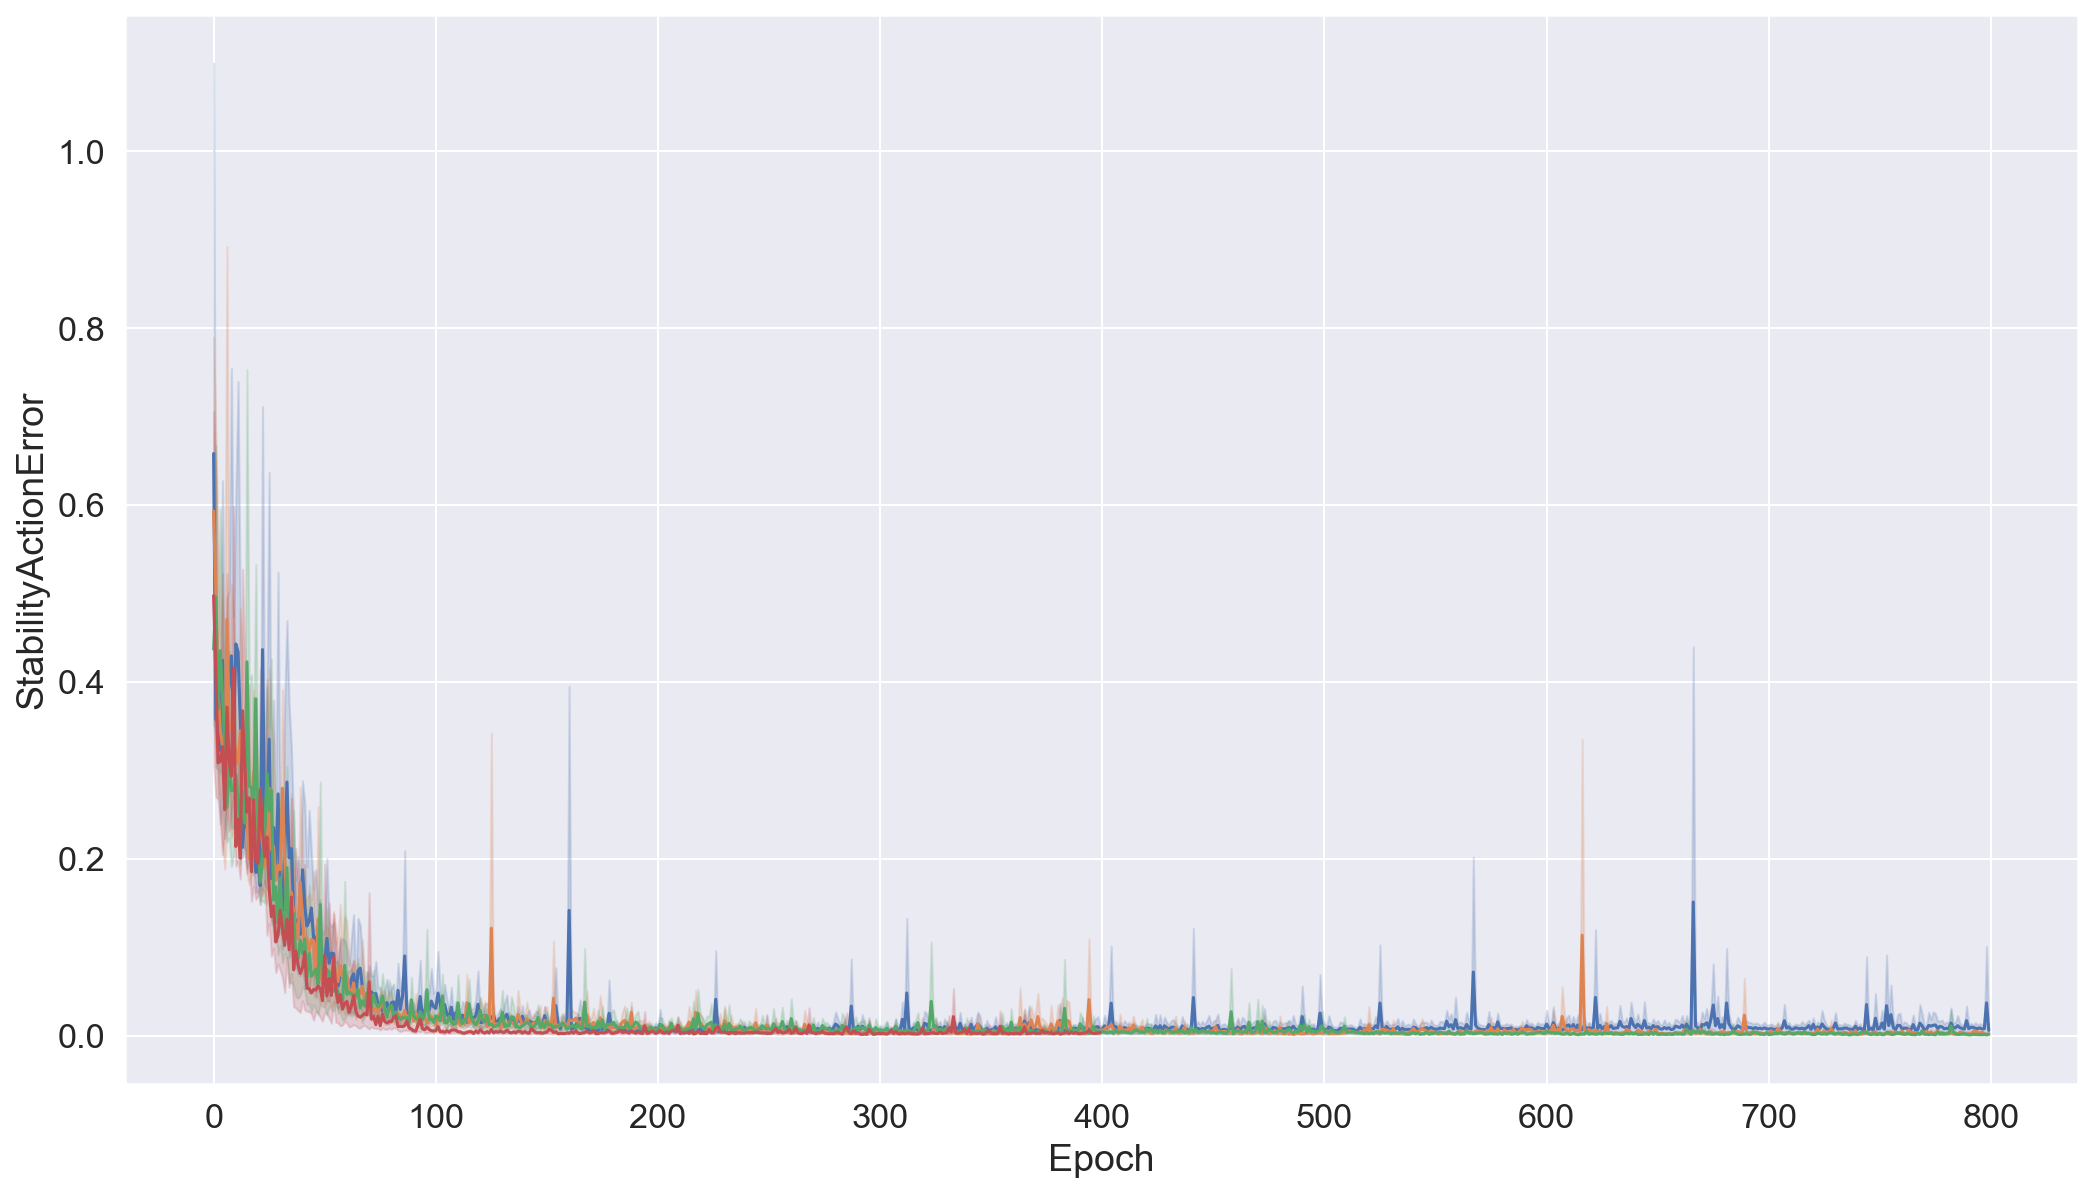

In [11]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

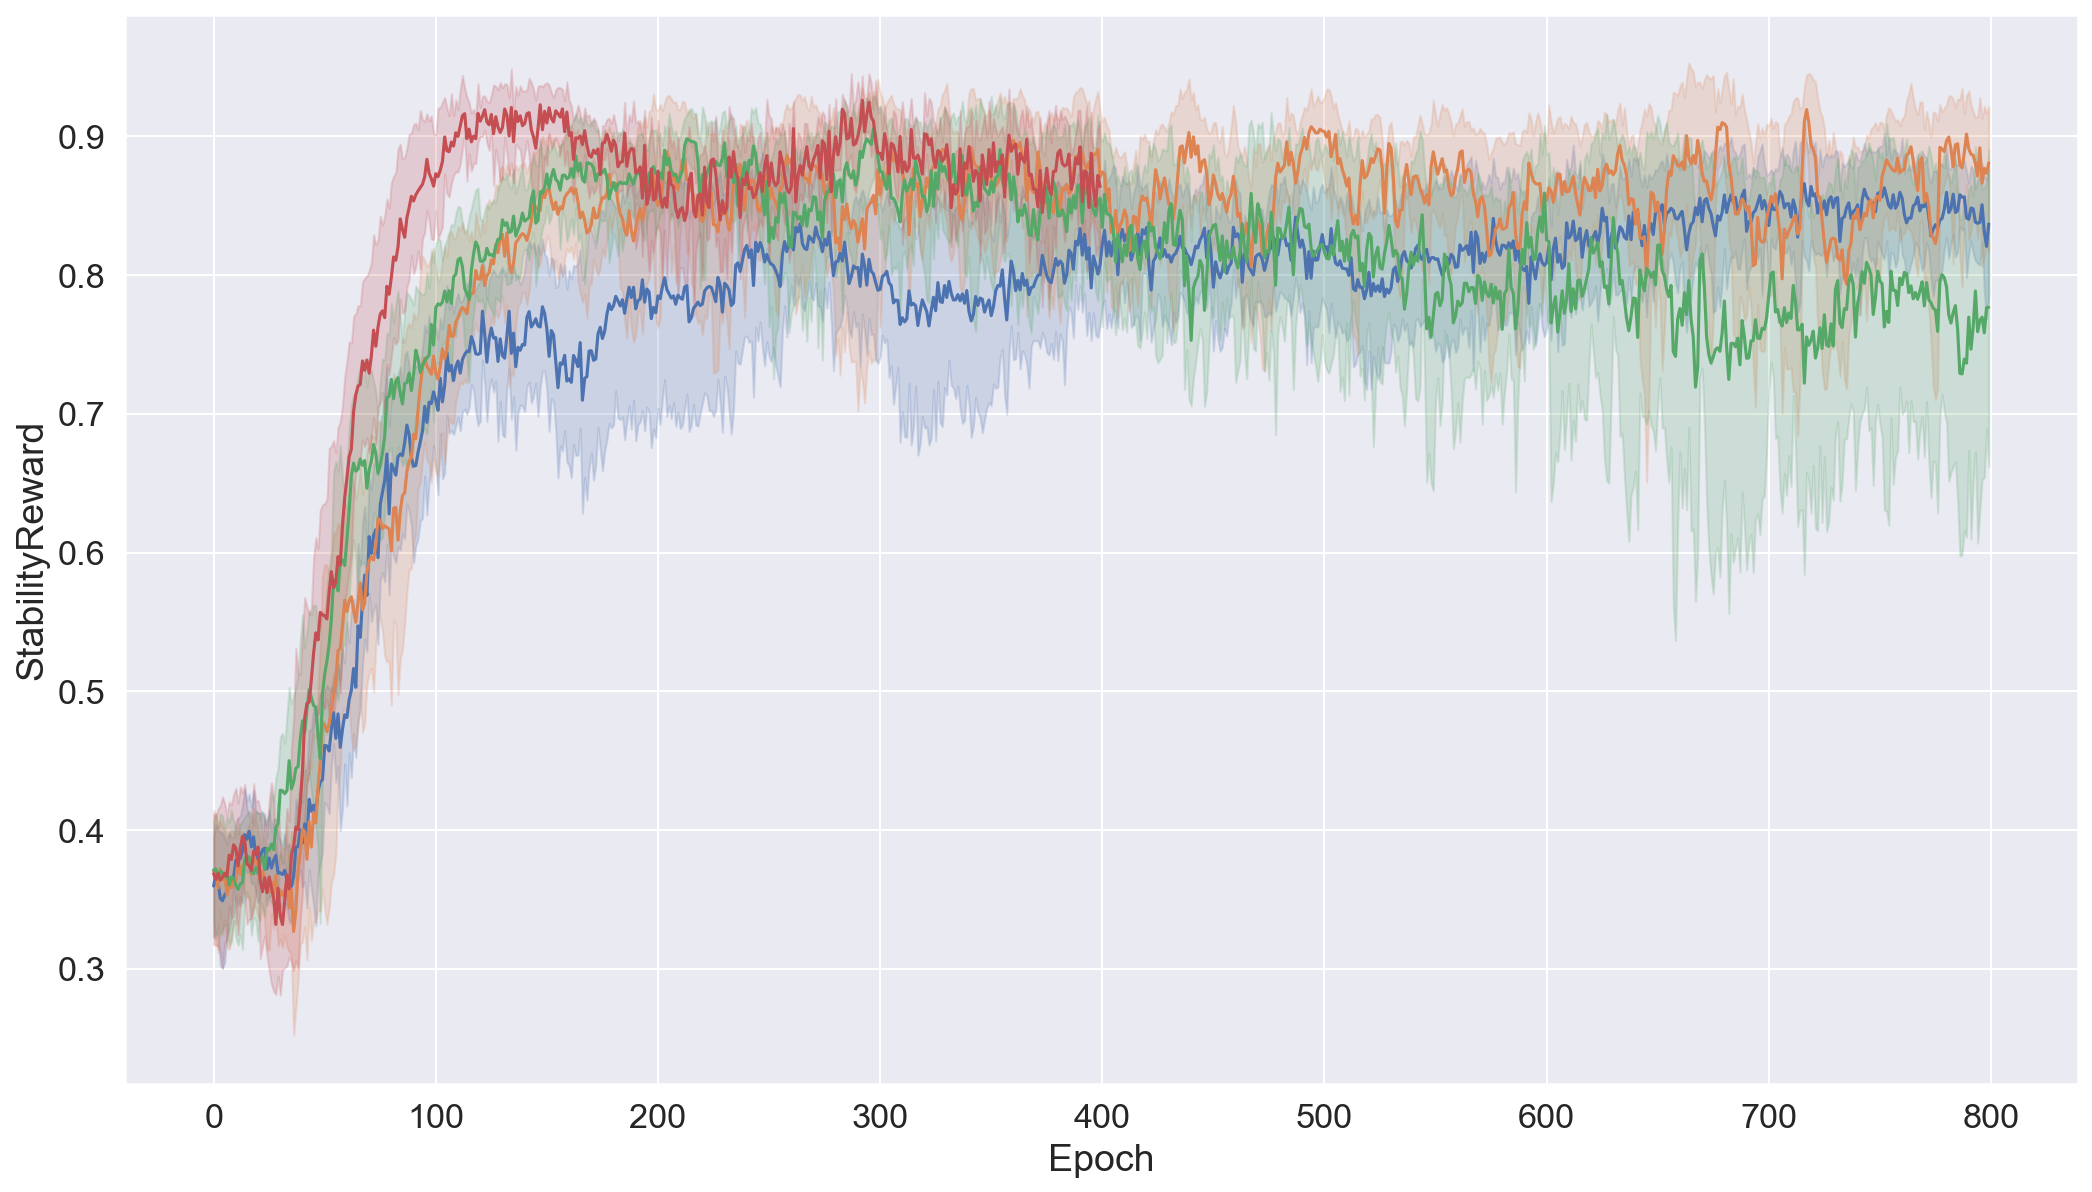

In [17]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityReward', smooth=1, show_legend=False)
plt.show()

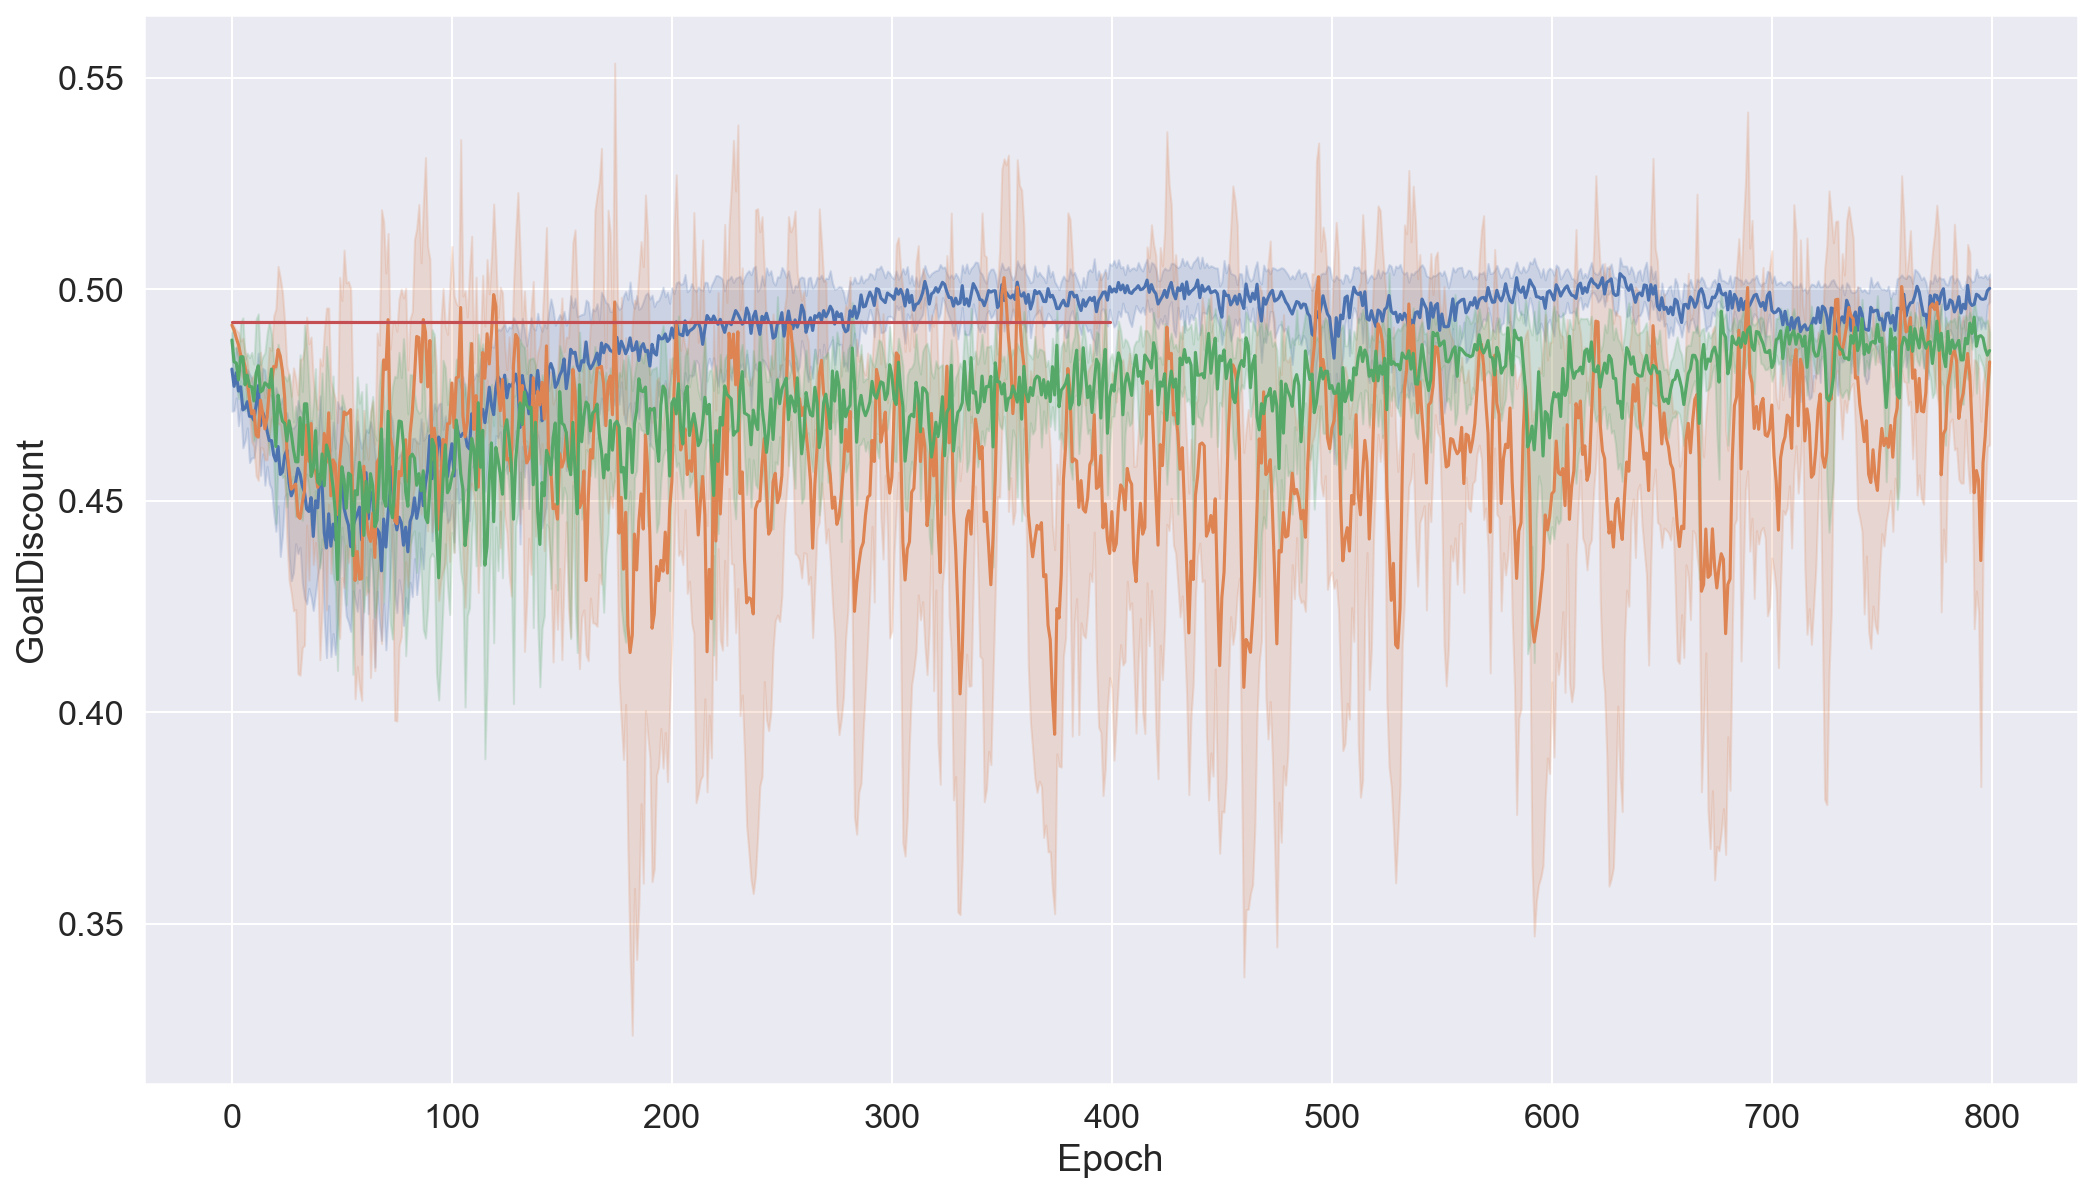

In [12]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalDiscount', smooth=1, show_legend=False)
plt.show()

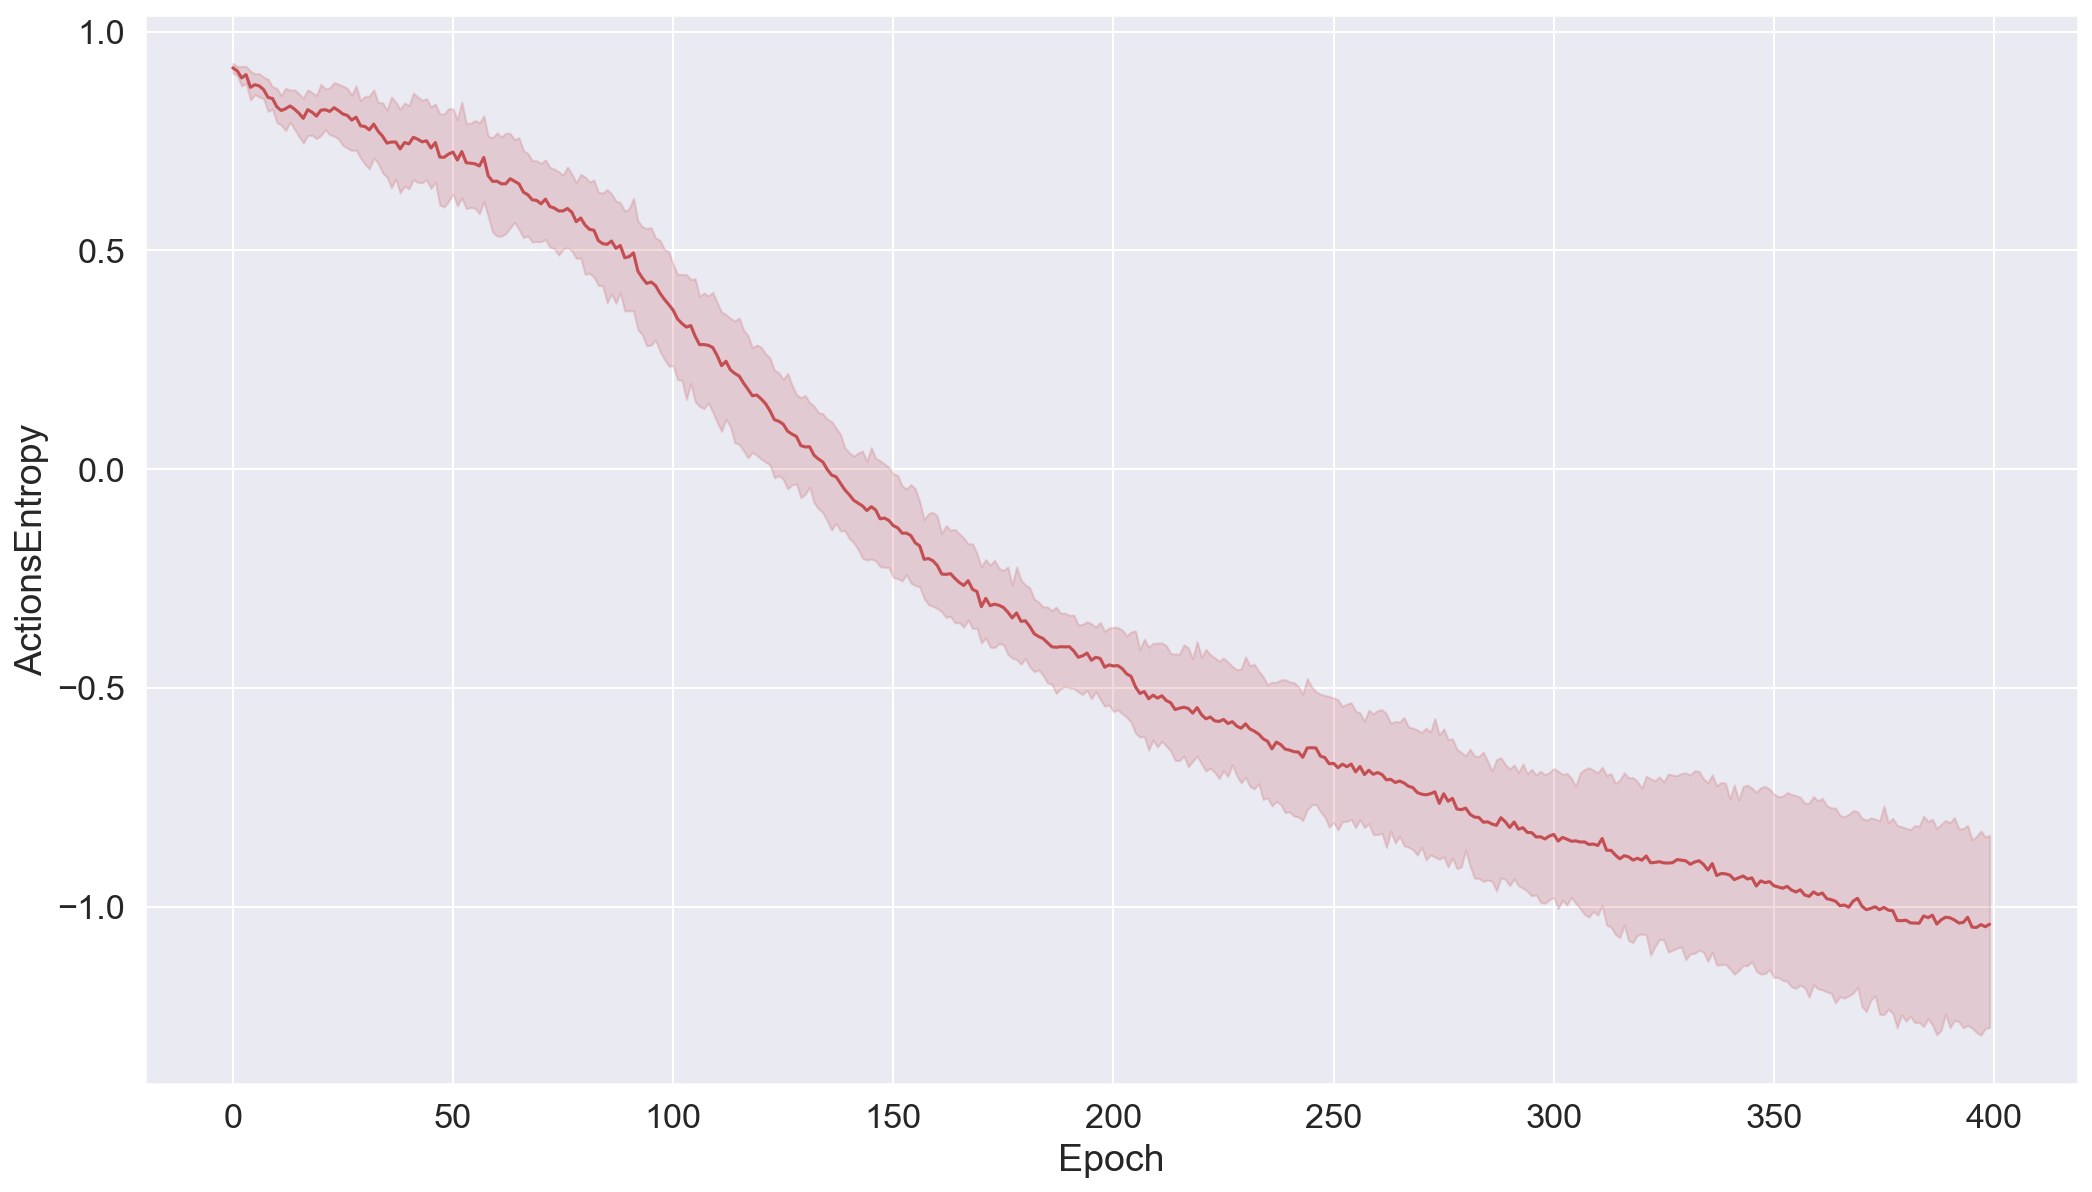

In [13]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

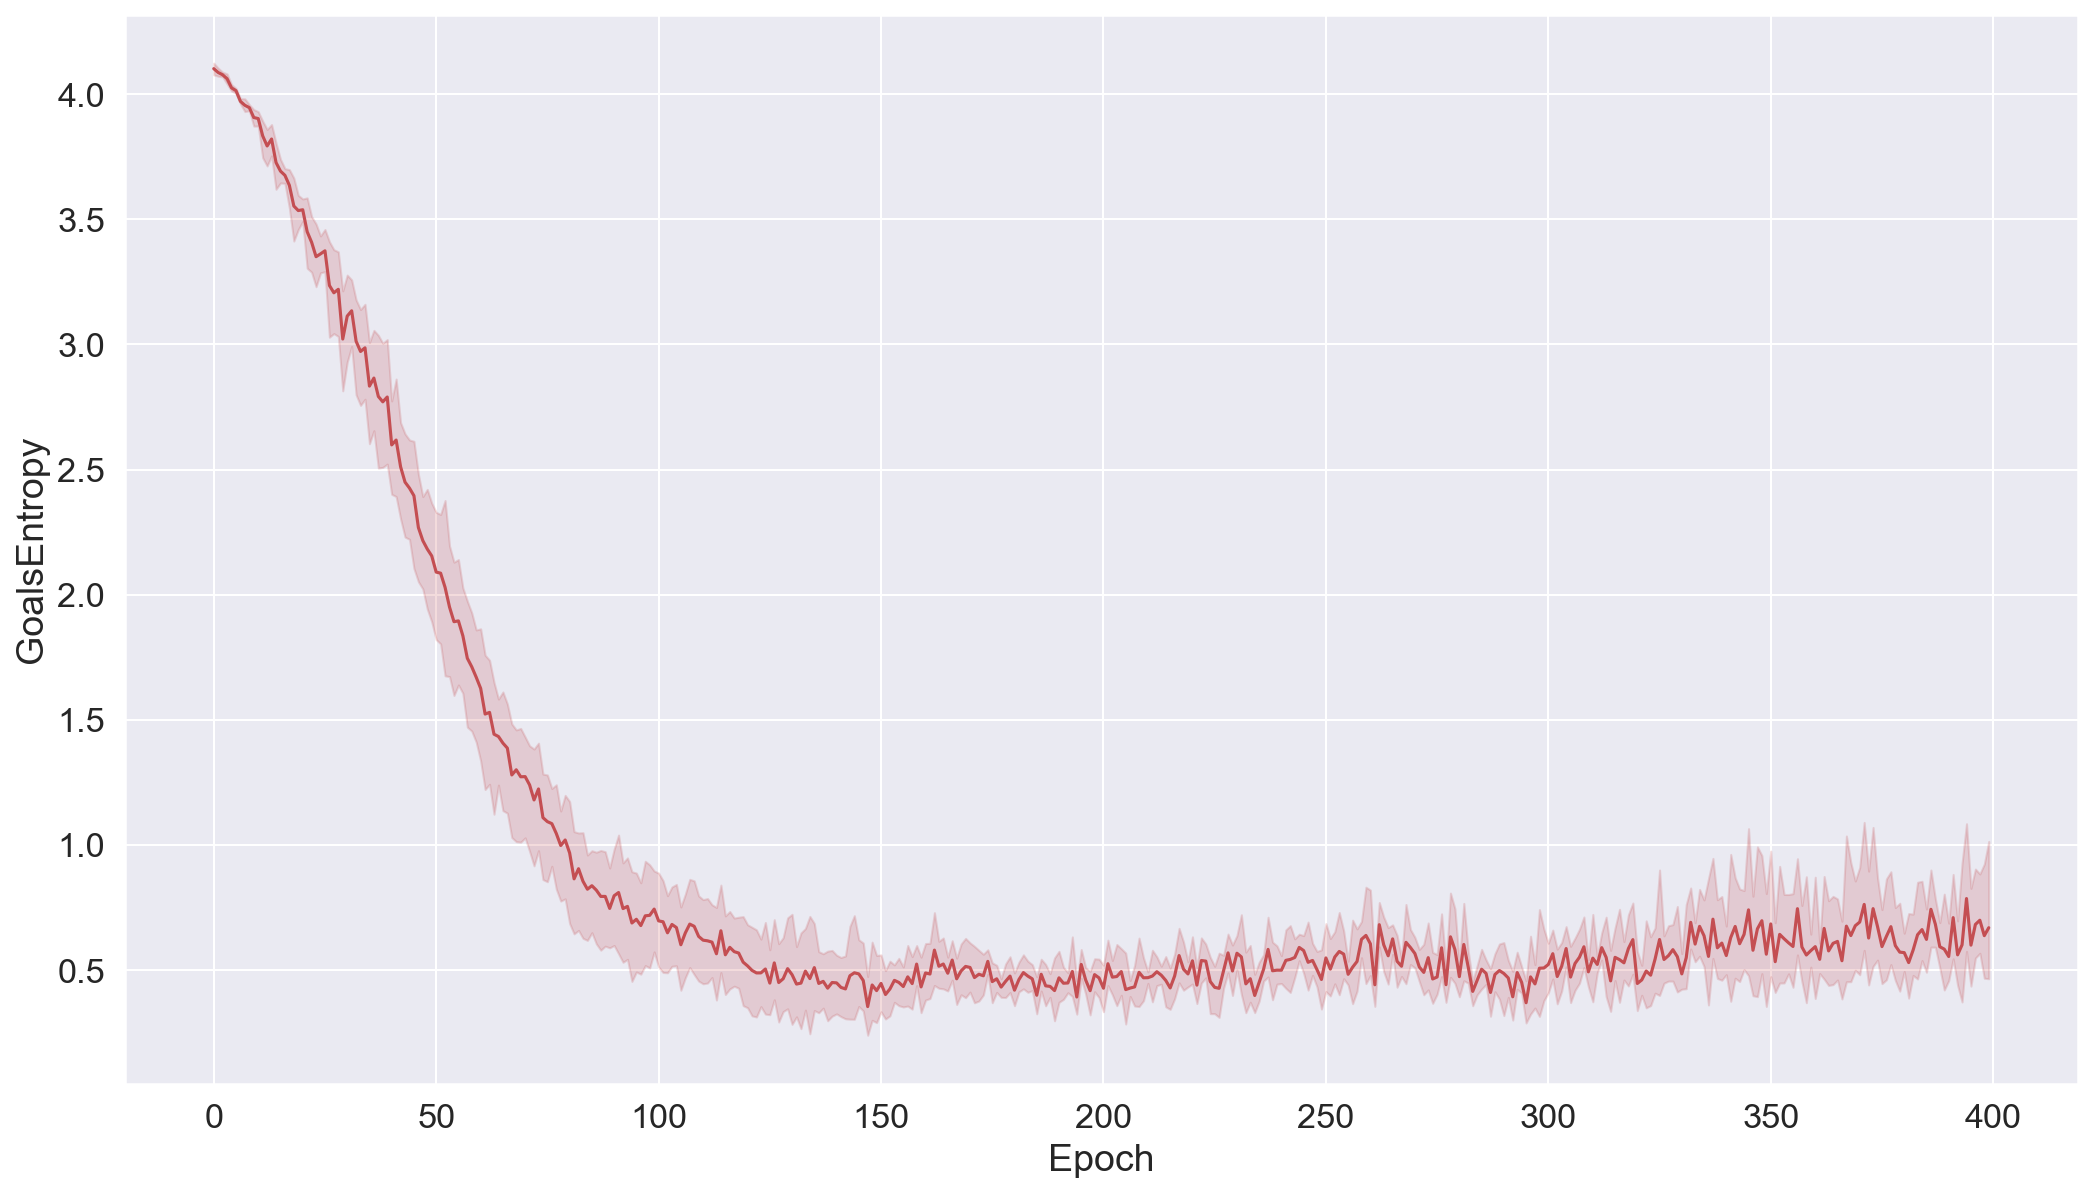

In [14]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()